# Clase 14 - Feature Engineering 📎

MDS7202: Laboratorio de Programación Científica para Ciencia de Datos
Profesor: Ignacio Meza De la jara

## Recapitulemos 🤠






    📝 Recordemos por que usamos este flujo! 

MLOps, o Operaciones de Aprendizaje Automático, es un conjunto de prácticas y herramientas que automatizan y gestionan el ciclo de vida del aprendizaje automático desde el desarrollo hasta la implementación. Mejora la eficiencia, consistencia, escalabilidad, reproducibilidad y colaboración entre los científicos de datos, los ingenieros de aprendizaje automático y otras partes interesadas. MLOps ayuda a las organizaciones a crear, implementar y administrar modelos de aprendizaje automático de manera confiable, escalable y eficiente, lo que en última instancia mejora la calidad de los modelos y facilita su implementación en producción.

![ML ops](https://camo.githubusercontent.com/4724bc1636a3fee34f87a1fac991fc4ccd270c0a3a510db04394f90b05d065eb/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f4d4453373230322f4d4453373230322f6d61696e2f7265637572736f732f323032332d30312f31332d4544412f6d65746f646f6c6f6769612e706e67)

## Objetivos de la Clase 🎯



- Comprender qué son los métodos de aprendizajes automático.
- Comprender qué son las features en el aprendizaje automático y por qué son importantes.
- Aprender técnicas de selección de características, como la eliminación de características redundantes o irrelevantes.
- Aprender técnicas de transformación de características, como la normalización o la creación de características sintéticas.
- Comprender que las características afectan el rendimiento del modelo y cómo evaluar las características seleccionadas.
- Aprender a aplicar técnicas de feature engineering utilizando Scikit-Learn.

señalar que en la segunda se van a hacer nuevas caracteristicas


## ¿Que es Machine Learning? 🤔

Machine Learning es un subcampo de la inteligencia artificial (IA) que se enfoca en el desarrollo de algoritmos y modelos informáticos que permiten a las computadoras aprender y mejorar automáticamente a través de la experiencia, sin ser programadas explícitamente para realizar tareas específicas.

En lugar de ser programadas con reglas predefinidas, las máquinas de aprendizaje automático pueden aprender y adaptarse a partir de datos de entrada, identificando patrones, haciendo predicciones y tomando decisiones basadas en la información disponible. Estos modelos son entrenados utilizando datos históricos y retroalimentación, y pueden ajustarse y mejorar con el tiempo a medida que se les expone a más datos.

<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/14-Feature-Engineering/machine_learning.png?raw=true' width=700 />

### Esquema General de Machine Learning


#### Unsupervised Learning / Aprendizaje No Supervisado

Técnicas que no requieren datos etiquetados para entrenar modelos predictivos. Dentro de estos algoritmos encontramos los siguientes grupos: 


- **Clustering:** Técnicas para agrupar observaciones por su similitud a través de métricas de distancia (como la distancia euclideana por ejemplo). Permite encontrar grupos que no son claros ante nuestro criterio. Por ejemplo, agrupar clientes según sus características.


- **Reducción de Dimensionalidad:** Conjuntos de técnicas que permiten representar datos en menos dimensiones que las originales. Su utilidad radica tanto en mejorar el rendimiento de los clasificadores como también en permitir visualizar datos. Ejemplo: Usar T-SNE para proyectar los datos del Better Life Index en dos dimensiones. 

In [ ]:
#anexar imagenes

   
### Supervised Learning / Aprendizaje Supervisado

Técnicas que requieren datos etiquetados para entrenar modelos predictivos. Dentro de estos algoritmos encontramos los siguientes grupos:


- **Clasificación:** Tarea que consiste en predecir una clase/categoría. Ejemplo: Predecir si una persona tiene caries o no a partir de una imagen.


- **Regresión:** Tarea que consiste en predecir un número real. Ejemplo: A partir del registro metereológico, elaborar un clasificador que permita predecir la temperatura de mañana.

In [ ]:
#anexar imagenes

> **Pregunta ❓:** ¿Qué necesito para desarrollar un modelo predictivo?

## ¿Qué es Feature Engineering? 🧮



Feature engineering es el proceso de seleccionar, transformar y crear características relevantes de entrada para construir un modelo de aprendizaje automático preciso y eficiente.

> **Pregunta ❓:** ¿Se necesita algún conocimiento previo para realizar Feature Engineering?

In [ ]:
motivación con el dataset 

### ¿Por que es importante? 🤨

Muchos de los algoritmos de aprendizaje automatico **poseen un mejor desempeño cuando los valores de las features** (aka columnas) **se transforman a un valor facil de interpretar por los modelos**. Por otro lado, datos sucios pueden entorpecer las predicciones generadas por nuestros modelos, al igual que las escalas en que se presentan los datos. Por esto, **es relevante que las features que utilizemos se encuentren en escalas similares y con distribuciones relativamente similares a la distribución normal**.

Consideren los siguientes ejemplos:

**Ejemplo 1**

- El gráfico de la derecha se grafica una variable con respecto a otra sin escalar 
- El gráfico de la izquierda muestra ambas variables estandarizadas:

> **Pregunta ❓:** ¿Es entendible para un humano el gráfico de la derecha?¿Qué se puede interpretar de este?¿Qué efectos tendrá usar las variables no escaladas (izquierda) vs las escaladas (derecha) usando algún modelo predictivo basado en distancias?

<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/14-Feature-Engineering/escalamiento_2.png?raw=true' width=1000 />

<div align='center'>
    Fuente: <a href='https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html'>Compare the effect of different scalers on data with outliers en el User Guide de Scikit-learn</a>.
</div>

<div align='center'>
    Los Datos son del dataset <a href='https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset'>California Housing dataset</a>. 
</div>

**Ejemplo 2**

- El gráfico de la derecha se grafica una variable un conjunto de variables en 2 dimensiones diferenciadas por la clase. 
- El gráfico de la izquierda se grafica el mismo grafico pero con el conjunto de variables transformado:

> **Pregunta ❓:** ¿Cual de los dos conjuntos de datos es mas facil de separar?¿Que efectos tendría utilizar las variables en el estado original contra el estado final para algún modelo lineal?.

<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/14-Feature-Engineering/feature-engineering1.jpg?raw=true' width=1000 />

<div align='center'>
    Fuente: <a href='https://www.kdnuggets.com/2018/12/feature-engineering-explained.html'>Feature Engineering for Machine Learning: 10 Examples</a>.
</div>

### ¿Pero que hay del Deep Learning, no que solucionaba este problema? 😣



Si bien uno de los aspectos mas relevantes del Deep Learning es la extracción automatica de las features desde los datos, sin embargo:

- El desarrollo actual de deep learning no nos permite abstraer todas las features desde los datos.
- Muchas empresas no utilizan deep learning para generar modelos, ya sea por capacidad o simplemente porque no lo necesitan. **Recalcar, el deep learning no es la solución para todo!** [Ejemplo](https://arxiv.org/pdf/2106.03253.pdf)
- Deep learning suele tener buenos resultados en datos no estructurados, sin embargo en datos tabulares no.

### ¿Como podemos realizar este proceso? 💻



Actualmente podemos realizar feature engineering de muchas formas, especificamente no necesitamos mas que `numpy` o `Pandas` para generar features, pero hay un sin fin de herramientas que nos pueden facilitar la vida.

En aspectos generales, la extracción de caracteristicas la podemos realizar de las siguientes formas:

- **Python**: Es uno de los lenguajes de programación más populares para el aprendizaje automático y cuenta con varias bibliotecas útiles para el feature engineering, como Pandas, NumPy y Scikit-learn.

- **R**: Es otro lenguaje de programación popular para el aprendizaje automático y cuenta con bibliotecas como dplyr y tidyr para el manejo y transformación de datos.

- **SQL**: Puede ser utilizado para realizar consultas y transformaciones en bases de datos para la selección y extracción de características.

- **Big Data**: Tecnologías como Hadoop y Spark permiten el procesamiento y análisis de grandes cantidades de datos y pueden ser útiles para el feature engineering en grandes conjuntos de datos.

- **AutoML**: Herramientas como H2O.ai o DataRobot pueden automatizar parte del proceso de feature engineering, utilizando técnicas de aprendizaje automático para seleccionar y transformar automáticamente las características.

>Importante: Para efectos de este curso nos enfocaremos en el desarrollo de features utilizando `Python`, sin embargo en la industria se van a encontrar con la utilización de `SQL`, `PySpark`, `DataFlow`, entre otras para la extracción.




<img src="https://www.tecton.ai/wp-content/uploads/2020/10/whatisfeaturestore3.svg" width=400/>

## Veamos nuestra librería core: Scikit-Lern ⚒️

<img src="https://raw.githubusercontent.com/MDS7202/MDS7202/a60ef458182c2f26af3aaf4f8e0446a8512d4f75/clases/2022-01/15_Preprocesamiento_Intro_a_Scikit-Learn/resources/scikit-learn.png" width=400/>

[`scikit-learn`](https://scikit-learn.org/stable/) es probablemente una de las librerías de Aprendizaje Automático más populares para Python. *Open-source* y construida sobre `numpy`, `scipy` y `matplotlib`, ofrece interfaces y flujos de trabajos (*frameworks*) simples y eficientes para construir aplicaciones enfocadas análisis de datos y predicción.
Sus *APIs* permite generar código limpio y está provista de una extensa documentación.

> Parentesis: API: **Application Programming Interface / Interfaz de programación de aplicaciones** - Son las interfaces comunes (funciones, objetos, métodos, etc..) que un software o librería ofrece para comunicarse con el resto. Esta define entre otras cosas: el tipo de llamadas o funciones que pueden ser hechas, como hacerlas, el tipo de datos de entrada y salida, las conveciones, etc...

Una gran ventaja de Scikit-learn consiste en su estructura transversal de clases y herencia. La mayoría de clase pertenece a alguna de estas dos categorías:

* *`transformers`*: Permite transformar datos input antes de utilizar algoritmos de aprendizaje sobre ellos. Con las clases *`transformers`*, se pueden realizar imputaciones de valores faltantes, estandrización de variables, escalamientos y seleccion de caracterísiticas por medio de algoritmos especializados. Esto comunmente se logra a través de las interfaces
    - `fit` que permite aprender los parámetros de la transformación, por ejemplo la media y varianza en la normalización.
    - `transform` que aplica la transformación a los datos.
    - `fit_transform` permite ambas operaciones al mismo tiempo.

* *`estimators`*: Proveen los algoritmos de aprendizaje automático a través de los métodos `fit` y `predict`.

El método usual de importación se basa en seleccionar un submódulo de la librería indicando (de manera opcional) el objeto que se utilizará. Por ejemplo, si se desea utilizar el escalador de datos Min-Máx del submódulo `preprocessing`, se haría de la manera usual, por medio de:

```python
from sklearn.preprocessing import StandardScaler
```

> **Nota**: No se recomienda importar la librería completa `import sklearn as sk` pues su estructura de submódulos es suficientemente grande, como para considerar cada uno como una librería. 


A lo largo del curso se estudiarán distintos componentes de esta librería. Durante esta clase nos centraremos en los módulos `preprocessing`, `compose` y `pipeline`.

## Problema a visitar: House Pricing

![House Pricing](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

Fuente: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Al igual que en la clase anterior, el dataset **`house pricing`** consiste en 80 variables (79 variables explicativas más una variable objetivo) que describen aspectos fundamentales de hogares residenciales en la ciudad de *Ames, Iowa*. 

La variable objetivo es el precio final de cada hogar (regresión)

In [1]:
# Importamos librerías a utilizar en la clase
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm

import plotly.express as px

In [2]:
# El conjunto a trabajar es el de entrenamiento
df = pd.read_csv(
    "https://raw.githubusercontent.com/MDS7202/MDS7202/main/recursos/2023-01/13-EDA//train.csv",
    index_col="Id",
)
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Operaciones Comunes de Feature Engineering

Debido a la importancia que posee de la etapa de Feature Engineering en los proyectos de ML, se han desarrollado muchas técnicas para agilizar el proceso. En esta sección veremos algunas de las más conocidas, entre las que se encuentran: 

- **Missing Values**
- **Escalamiento de variables**
- **Discretización** 
- **Codificación de características categóricas**
- **Generación de las características cruzadas**.

Sin embargo, a pesar de que no forma parte de un proceso de feature Engineering tradicional, comentaremos que es el **data-drift** y porque es importante que lo midas al momento de trabajar con tus variables.

### Missing Values 

Una de las grandes diferencias que se visualizan al momento de utilizar datos productivos es que no presentan todos los valores o la calidad de los datos es muy baja. Con esto, uno de los principales problemas que debemos enfrentar son los datos faltantes.

> **Pregunta ❓:** ¿Por qué nos interesaría tratar los datos nulos?¿Como podríamos tratarlos?.

<img src="https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/14-Feature-Engineering/table_example_1.png?raw=true" width=600/>

<div align='center'>
    Fuente: <a href='https://www.amazon.com/Designing-Machine-Learning-Systems-Production-Ready/dp/1098107969'>Designing Machine Learning Systems</a>.
</div>

En terminos de datos faltantes podemos identificar tres, estos son:

- **Missing not at random (MNAR)**: Esto ocurre cuando el motivo por el que falta un valor es el propio valor real. O sea, hay una intencionalidad en ocultar el dato faltante. Para el caso de la tabla de ejemplo, podría darse que las personas omitian sus su sueldos para no ser discriminados.

> **Pregunta ❓:** ¿Como podriamos tratar este dato?

- **Missing at random (MAR)**: Esto ocurre cuando la razón por la que falta un valor no se debe al valor en sí, sino a otra variable observada. En este ejemplo, podríamos observar que los valores de edad a menudo faltan para los encuestados del sexo "A", lo que podría deberse a que a los encuestados del sexo "A" no les gusta revelar su edad.

> **Pregunta ❓:** ¿Como podriamos tratar este dato?

- **Missing completely at random (MCAR)**: Esto ocurre cuando no hay un patrón cuando falta el valor. Este tipo de missing value es muy raro y suelen haber razones por las que faltan determinados datos, por lo que debería investigarse.

### Deletion & Imputation ☠️

#### Deletion 🪄
Una de las primeras técnicas para lidiar con los datos faltantes es **Deletion** y tal como el nombre lo dice este tipo de tratamiento tiene como objetivo eliminar la columna (**column deletion**) o la fila que presenta problemas (**row deletion**). 

>Nota❗: El beneficio de esta técnica es que es muy fácil de aplicar y no necesitas más que numpy o pandas para aplicar la eliminación. Sin embargo, estos métodos generan una pérdida de datos y potencialmente aumento en el sesgo de los modelos (👀 OJO: esto depende mucho del caso de estudio)

Para el caso de **Column Deletion** este se aplica cuando una columna tiene un alto porcentaje de datos nulos. Una buena practica es eliminar aquellas columnas que poseen un porcentaje de nulos mayores a 80%.

In [59]:
# Column Deletion
# Comenzamos contando la cantidad de nulos
features_nulls = df.isna().sum(axis=0)*100/df.shape[0] # calculamos el porcentaje por columna
features_nulls = features_nulls[features_nulls>0].sort_values(ascending=False) # obtenemos solo las var. mayor a 0

# Plot
fig = px.bar(features_nulls, 
       title='Porcentaje de nulos por variable') # Gráficamos
fig.update_layout(
    xaxis_title='Features',
    yaxis_title='Porcentaje',
    showlegend=False
                 )

In [38]:
drop_features = features_nulls[features_nulls>80]
df_col_del = df.drop(columns=drop_features.index)
print(f"Dimensión de DataFrame sin tratamiento {df.shape}")
print(f"Dimensión de DataFrame con tratamiento {df_col_del.shape}")

Dimensión de DataFrame sin tratamiento (1460, 80)
Dimensión de DataFrame con tratamiento (1460, 76)


> **Pregunta ❓:** ¿Que impactos posee este tipos de técnicas?

Por otro lado, **Row Deletion** se aplica cuando se elimina un caso que posea datos nulos y no la columna completa. 

In [57]:
# Row Deletion
# De forma alternativa al column deletion, contamos la cantidad de nulos que tenemos por usuarios
df_row_del = df.isna().sum(axis=1)*100/df.shape[1]
df_row_del = df[~(df_row_del > 10)]
print(f"Dimensión de DataFrame sin tratamiento {df.shape}")
print(f"Dimensión de DataFrame con tratamiento {df_row_del.shape}")

Dimensión de DataFrame sin tratamiento (1460, 80)
Dimensión de DataFrame con tratamiento (1354, 80)


> **Pregunta ❓:** ¿Que impactos posee este tipo de técnica?

Con las metodologías señaladas, **¿Qué otras características/estadístico sería relevante para considerar para eliminar una featute?** 🤔

##### Respuesta

Una buena forma es revisar que las variables no se mantengan estáticas en todo el conjunto de datos (o sea, **es importante que las variables tengan variabilidad**). Una forma fácil de revisar esto es calculando la desviación estándar en las variables numéricas y revisando la cantidad de valores únicos en las variables categóricas.

In [16]:
# Caso Categorico
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [17]:
# Caso Categorico
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [3]:
# Caso Categorico
df['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [11]:
# Caso Númerico
std_an = df.std(axis=0, numeric_only=True)
std_an = std_an[(std_an<1)]
std_an

BsmtFullBath    0.518911
BsmtHalfBath    0.238753
FullBath        0.550916
HalfBath        0.502885
BedroomAbvGr    0.815778
KitchenAbvGr    0.220338
Fireplaces      0.644666
GarageCars      0.747315
dtype: float64

#### Imputation 🧩

Otra metodología relevante para rellenar los valores faltantes es la imputación de datos, esta es una alternativa al método anterior y al igual que el método anterior posee variaciones para su aplicación.

El método más sencillo de imputación es rellenar por el valor `default`, por ejemplo, si en una base de compras en casas comerciales falta el dato del rubro en el que se realizó la compra, una forma sencilla de solucionar esto es agregando los datos nulos como un string vacío "".

Otras técnicas comunes son la imputación de los datos nulos con la media, mediana y moda de los datos. Sin embargo, es relevante que se tenga en cuenta el impacto que poseen las diferentes imputaciones dentro de los datos.

> **Pregunta ❓:** ¿Se les ocurren ejemplos de casos de mala imputación?.

La imputación al igual que la eliminación de columnas y/o filas conlleva problemas. Entre los problemas de este método podemos encontrar: añadir ruido a nuestros datos, añadir sesgo y data leakage (¿Por qué?).



##### 🙌 Pongamonos manos a la obra con Scikit-Learn:

Con Scikit-Learn el módulo que nos permite realizar imputaciones lleva por nombre: `sklearn.impute`. Esta entrega diversos métodos de imputación que van desde lo más básico como lo que ofrece `SimpleImputer`, hasta técnicas más avanzadas de imputación como `KNNImputer`.

Es importante que tengan en cuenta que estas no son las unicas metodologías existentes, algunos métodos más modernos proponen el entrenamiento de modelos bayesianos que generan estimaciones menos ruidosas en los datos: [ejemplo](https://num.pyro.ai/en/stable/tutorials/bayesian_imputation.html)

La clase `SimpleImputer` proporciona estrategias básicas para imputar valores perdidos de forma univarida. Los valores perdidos se pueden imputar con un valor constante proporcionado, o utilizando los estadísticos (media, mediana o más frecuente) de cada columna en la que se encuentran los valores perdidos. Esta clase también permite diferentes codificaciones de valores perdidos.

In [52]:
# Utilización de SimpleImputer (el imputer mas básico)
from sklearn.impute import SimpleImputer

# Guardamos las variables númericas
df_imp = df.copy() 
numeric_cols = df_imp._get_numeric_data().columns

# Inicializamos el imputador
imp = SimpleImputer(missing_values=np.nan, strategy='mean') 
# la strategy puede ser “mean”, “median”, “most_frequent” o una constante

# Obtenemos los valores de interes
df_imp[numeric_cols] = imp.fit_transform(df[numeric_cols])

In [53]:
df[df[numeric_cols].isna().any(axis=1)][numeric_cols].head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
8,60,NaN,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
13,20,NaN,12968,5,6,1962,1962,0.0,737,0,...,140,0,0,0,176,0,0,9,2008,144000
15,20,NaN,10920,6,5,1960,1960,212.0,733,0,...,0,213,176,0,0,0,0,5,2008,157000
17,20,NaN,11241,6,7,1970,1970,180.0,578,0,...,0,0,0,0,0,0,700,3,2010,149000
25,20,NaN,8246,5,8,1968,2001,0.0,188,668,...,406,90,0,0,0,0,0,5,2010,154000


In [54]:
# Revisemos cuantas columnas númericas nulas encuentra tras la transformación
cant_nulos_num = df_imp[df_imp[numeric_cols].isna().any(axis=1)][numeric_cols].shape[0]
print(f"Columnas númericas nulas tras la imputación por SimpleImputer: {cant_nulos_num}")
print(df_imp.shape)
df_imp.head()

Columnas númericas nulas tras la imputación por SimpleImputer: 0
(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0
2,20.0,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0
3,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0
4,70.0,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0
5,60.0,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000.0


La clase `KNNImputer` utiliza el enfoque de k-Nearest Neighbors para realizar la imputación. Por defecto, se utiliza una métrica de distancia euclidiana que admite valores perdidos, nan_euclidean_distances, para encontrar los vecinos más cercanos. Las características de los vecinos se promedian uniformemente o se ponderan por la distancia a cada vecino. 

Si a una muestra le falta más de una característica, los vecinos de esa muestra pueden ser diferentes en función de la característica concreta que se impute. Cuando el número de vecinos disponibles es inferior a n_vecinos y no hay distancias definidas al conjunto de entrenamiento, se utiliza la media del conjunto de entrenamiento para esa característica durante la imputación. Si hay al menos un vecino con una distancia definida, durante la imputación se utilizará la media ponderada o no ponderada de los vecinos restantes. 

👁️ **OJO**: Si una característica falta siempre en el entrenamiento, se elimina durante la transformación.

In [48]:
from sklearn.impute import KNNImputer

# Guardamos las variables númericas
df_imp = df.copy() 
numeric_cols = df_imp._get_numeric_data().columns

imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_imp[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [50]:
# Revisemos cuantas columnas númericas nulas encuentra tras la transformación
cant_nulos_num = df_imp[df_imp[numeric_cols].isna().any(axis=1)][numeric_cols].shape[0]
print(f"Columnas númericas nulas tras la imputación por KNN: {cant_nulos_num}")
print(df_imp.shape)
df_imp.head()

Columnas númericas nulas tras la imputación por KNN: 0
(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0
2,20.0,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0
3,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0
4,70.0,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0
5,60.0,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000.0


> **Pregunta ❓:** ¿Qué otro factor podría afectar las variables?¿Qué sucede si mi conjunto de entrenamiento es diferente al de testing?¿Tiene sentido utilizar variables que posean otra distribución en producción?.

### Escalamiento

Un paso importante antes de introducir features en los modelos, es el escalamiento de las variables. El objetivo de esto es que el dominio de las variables sea similar y de esta forma obtener mejores resultados. Este proceso es una de las cosas más sencillas que se pueden hacer y que (por lo general) se traduce en un aumento del rendimiento del modelo. Ojo que no hacer esto puede hacer que su modelo no tenga sentido como es el caso de algoritmos clásicos.

Tomar en consideración que muchos de los algoritmos modernos como **XGBoost** señalan que no necesitan escalamiento para el entrenamiento, sin embargo, escalar las variables de entrada puede impactar positivamente en el poder predictivo del modelo.

Para realizar el escalamiento utilizaremos el módulo `sklearn.preprocessing`, este entrega diversas técnicas de escalamiento, normalización y estandarización de datos a través de clases `Transformers` (no confundir con los transformers de Deep Learning).

### Estandarización

La estándarización es una de las transformaciones mas relevantes a tener presente durante el modelamiento. esto debido a que un gran cantidad de algoritmos de aprendizaje automático / estadístico, asumen que los datos a operar se encuentran **distribuidos de manera normal**. **Si los datos no se distribuyen normalmente y contienen valores atípicos**, **es posible que la media y la desviación típica no reflejen con exactitud la tendencia central y la variabilidad de los datos**.

En la práctica, se ignora la forma de la distribución a trabajar y simplemente e transforma removiendo la media y escalando por la desviación estándar.


El objeto `StandarScaler` permite estandarizar datos.

**Ejemplo**

In [56]:
import plotly.express as px

px.histogram(df, x='OverallQual')

In [57]:
px.histogram(df, x='OverallCond')

In [58]:
px.histogram(df, x='GarageCars')

In [59]:
px.histogram(df, x='GarageArea')

In [60]:
px.histogram(df, x='GrLivArea')

In [61]:
cols_to_estandarize = [
    'OverallQual',
    'OverallCond',
    'GarageCars',
    'GarageArea',
    'GrLivArea'
]
fig1 = px.histogram(df[cols_to_estandarize].melt(),
             x='value',
             color='variable',
             barmode='group')

fig1.show()

La transformación a aplicar es mover todos los datos a una distribución normal con media 0 y varianza 1.

Para esto, por cada dato: 
    
$$ z = \frac{x - \mu}{\sigma}$$

En donde $\mu$ es la media de la columna y $\sigma$ es la desviación estándar.

Para esto, importamos escalador, lo inicializamos y luego ejecutamos `fit_transform` sobre los datos.
Notese que esto retorna un arreglo numpy con los datos escalados:

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()

estandarized_df = standard_scaler.fit_transform(df.loc[:, cols_to_estandarize])

estandarized_df

array([[ 0.65147924, -0.51719981,  0.31172464,  0.35100032,  0.37033344],
       [-0.07183611,  2.17962776,  0.31172464, -0.06073101, -0.48251191],
       [ 0.65147924, -0.51719981,  0.31172464,  0.63172623,  0.51501256],
       ...,
       [ 0.65147924,  3.07857028, -1.02685765, -1.03391416,  1.56964722],
       [-0.79515147,  0.38174271, -1.02685765, -1.09005935, -0.83278768],
       [-0.79515147,  0.38174271, -1.02685765, -0.9216238 , -0.49393395]])

Por comodidad, convertimos los datos escalados a un Dataframe:

In [63]:
estandarized_df = pd.DataFrame(estandarized_df, columns=cols_to_estandarize)
estandarized_df

,OverallQual,OverallCond,GarageCars,GarageArea,GrLivArea
0,0.651479,-0.517200,0.311725,0.351000,0.370333
1,-0.071836,2.179628,0.311725,-0.060731,-0.482512
2,0.651479,-0.517200,0.311725,0.631726,0.515013
3,0.651479,-0.517200,1.650307,0.790804,0.383659
4,1.374795,-0.517200,1.650307,1.698485,1.299326
...,...,...,...,...,...
1455,-0.071836,-0.517200,0.311725,-0.060731,0.250402
1456,-0.071836,0.381743,0.311725,0.126420,1.061367
1457,0.651479,3.078570,-1.026858,-1.033914,1.569647
1458,-0.795151,0.381743,-1.026858,-1.090059,-0.832788


In [64]:
estandarized_df.describe()

,OverallQual,OverallCond,GarageCars,GarageArea,GrLivArea
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-7.680310e-17,3.692632e-16,2.585451e-17,-2.022735e-17,-1.446332e-16
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-3.688413e+00,-4.112970e+00,-2.365440e+00,-2.212963e+00,-2.249120e+00
25%,-7.951515e-01,-5.171998e-01,-1.026858e+00,-6.479160e-01,-7.347485e-01
50%,-7.183611e-02,-5.171998e-01,3.117246e-01,3.284429e-02,-9.797004e-02
75%,6.514792e-01,3.817427e-01,3.117246e-01,4.820057e-01,4.974036e-01
max,2.821425e+00,3.078570e+00,2.988889e+00,4.421526e+00,7.855574e+00


Veamos ahora como se muestran las distribuciones de los datos estandarizados


Al aplicar `.fit_transform()` se obtienen los parámetros de media `.mean_` y desviación estándar `.scale_` para cada columna del dataframe operado. Observe que tales atributos del objeto tipo `StandardScaler` son públicos.

In [65]:
standard_scaler

StandardScaler()

In [66]:
standard_scaler.mean_

array([   6.09931507,    5.57534247,    1.76712329,  472.98013699,
       1515.46369863])

In [67]:
standard_scaler.scale_

array([  1.38252284,   1.11241818,   0.74705904, 213.73160808,
       525.30039356])

In [68]:
px.histogram(estandarized_df[cols_to_estandarize].melt(),
             x='value',
             color='variable',
             barmode='group')

<AxesSubplot:ylabel='Density'>

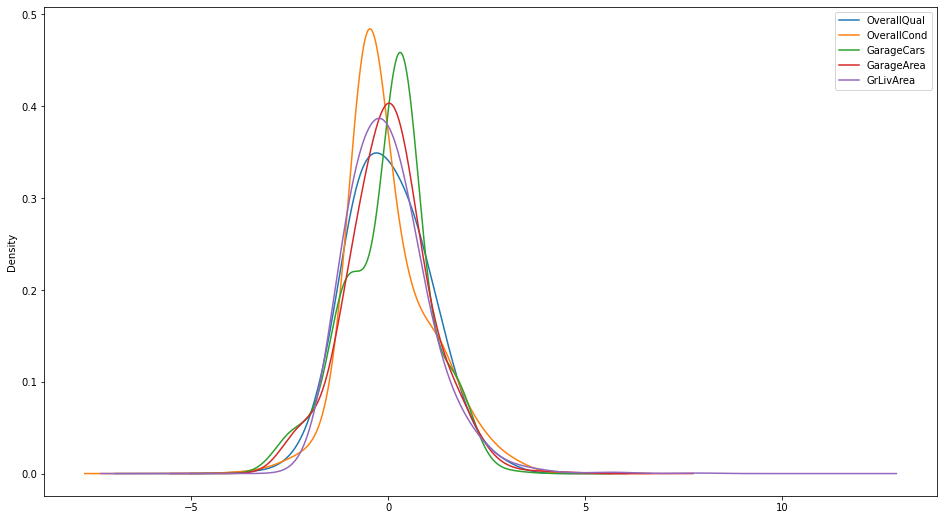

In [69]:
estandarized_df.plot.kde(figsize=(16,9), bw_method=0.5)

> **Pregunta ❓**: ¿Qué sucede con las variables que se alejan mucho de ser normales?

In [70]:
px.histogram(df, x='BsmtUnfSF')

### Escalamiento mínimo-máximo

Una buena alternativa al método anterior, es el escalamiento por rango, este tiene la forma:

\begin{equation}
\frac{x_{i} - \min(x)}{\max (x)-\min (x)}
\end{equation}

para $x$ columna a tratar, $x_i$ elemento a transformar. Esta transformación permite hacer que los datos se muevan entre 0 y 1 y puede ser utilizado y la distribución de los datos no normales. 

> **Nota:** este transformador se ve afectado por la presencia de outliers. 

In [71]:
px.histogram(df, 'Fireplaces')

In [72]:
cols_to_scale = ['BsmtUnfSF', 'Fireplaces']

# BsmtUnfSF = Unfinished square feet of basement area
df.loc[:, 'BsmtUnfSF'].plot.hist(backend='plotly')

In [73]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

scaled_data = minmax_scaler.fit_transform(df.loc[:, cols_to_scale])
scaled_data = pd.DataFrame(scaled_data, columns=cols_to_scale)

In [74]:
scaled_data.describe()

,BsmtUnfSF,Fireplaces
count,1460.000000,1460.000000
mean,0.242826,0.204338
std,0.189155,0.214889
min,0.000000,0.000000
25%,0.095462,0.000000
50%,0.204409,0.333333
75%,0.345890,0.333333
max,1.000000,1.000000


In [75]:
scaled_data.plot.hist(backend='plotly', barmode='overlay')

Comprobamos minimos y máximos:

In [77]:
scaled_data.min()

BsmtUnfSF     0.0
Fireplaces    0.0
dtype: float64

In [78]:
scaled_data.max()

BsmtUnfSF     1.0
Fireplaces    1.0
dtype: float64

Si se desea escalar por rengo, la mejor práctica es comprender los mínimos y máximos *absolutos* para cada columna. Esto se refiere, a las cotas superiores e inferiores que posee la columna **por definición**, a modo de ejemplo, considere un dataframe con las notas de una asginatura donde se enzeña análisis de datos, se sabe que la nota máxima en cierto ítem se codifica en una columna y su máximo es en efecto es 7.0, sin embargo el mínimo en dicha columna es 1.5, que es distinto al mínimo natural para dicho item que es 1.0. Esto puede acarrear problemas con datos nuevos, sobretodo si aparece una nota inferior a 1.5. 

> **Ejercicios 📝**

1. Investigue los parámetros que se deben usar para proporcionar escalamiento por rango con valores máximos y mínimos proporcionados explícitamente. 

2. Estudie el transformador `MaxAbsScaler`.

## Flujos de transformación con Pipelines

La manera anterior es bastante clara de comprender, sin embargo, es redundante y repite muchos patrones de asiganción tediosos. Los `Pipelines` están diseñados para resolver este problema.


Las transformaciones en un dataset son combinadas entre si, hasta obtener una versión ordenada de los datos, posteriormente, estas se combinan con estimadores para formar un flujo de trabajo *input-output*. En Sckit-Learn el flujo antes nombrado de denomina *composite estimator* y se construye por medio de objetos tipo `Pipeline`.


### Como Definimos un Pipeline

Un pipeline es una lista de tuplas. 

- La lista contiene todos los pasos que se efectuan desde la entrada hasta la salida del pipeline
- Cata tupla de la lista representa un subproceso del pipeline. Este debe estar compuesto por un nombre u la clase que corresponda.

![Pipeline](https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/14-Feature-Engineering/pipeline.png?raw=true)

Por ejemplo, para la imágen anterior, el pipeline sería: 

```python
pipe = Pipeline([('scaling', Scaler()),
                 ('dimensionality_reduction', DimReductor()),
                 ('predictive_model', Model())])
```

#### ¿Por qué debería usar pipelines?

1. Simplificación del proceso de aprendizaje automático: Las tuberías permiten combinar múltiples pasos en el proceso de aprendizaje automático, como el preprocesamiento de datos, la selección de características y el entrenamiento del modelo, en una única entidad. Esto simplifica el flujo de trabajo general y reduce las posibilidades de errores.

2. Procesamiento de datos consistente: Las tuberías aseguran que los mismos pasos de preprocesamiento de datos se apliquen de manera consistente tanto a los datos de entrenamiento como a los de prueba. Esto reduce el riesgo de sobreajuste y facilita la comparación del rendimiento de diferentes modelos.

3. Ajuste de hiperparámetros fácil: Las tuberías permiten ajustar los hiperparámetros de varios pasos en el proceso de aprendizaje automático simultáneamente utilizando la búsqueda en cuadrícula o la búsqueda aleatoria. Esto puede ayudar a encontrar la combinación óptima de hiperparámetros y mejorar el rendimiento del modelo.

4. Legibilidad y reutilización de código: Las tuberías proporcionan una forma clara y concisa de organizar el código, lo que facilita su lectura y mantenimiento. También permiten reutilizar la misma tubería para diferentes conjuntos de datos y modelos, ahorrando tiempo y esfuerzo.

5. Mejora del rendimiento: Al reducir la cantidad de manipulación de datos y cálculo requerido, las tuberías pueden llevar a tiempos de entrenamiento e inferencia de modelos más rápidos. Esto puede ser especialmente útil al trabajar con conjuntos de datos grandes o modelos complejos.

En nuestro caso, podemos definir un pipeline que opere sobre las variables ordinales de la siguiente manera:

In [ ]:
from sklearn.pipeline import Pipeline

cat_pipe = Pipeline([
    ('OneHot', OneHotEncoder())
    ])

cat_pipe.fit_transform(
    df.loc[:, ['Neighborhood', 'Utilities', 'Foundation']].dropna())

In [ ]:
LotArea_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('yeo-johnson', PowerTransformer(method='yeo-johnson'))
])

In [ ]:
LotArea_pipe.fit_transform(df.loc[:, ['LotArea']].dropna())

In [ ]:
LotArea_pipe.steps

En este caso, observamos que las transformaciones numéricas corresponden a un reshape, luego a escalar los datos y finalmente a transformarlos según el método de Yeo-Johnson.

> **Ejercicio 📝**

1. Genere un trasformador personalizado que permita transformar los datos de una pipeline diseñada sobre arreglos unidimensionales en series de Pandas. La función a implementar debe recibir un arreglo y un nombre de columna, debe entregar una serie con los datos transformados cuyo nombre es el nombre de la columna procesada. Añada este último transformador a las pipelines `cat_pipe` y `num_pipe`.

### ColumnTransformer

Es muy frecuente, es que los datos sea heterogéneos por ejemplo, es normal encontrar datasets con variables ordinales, categoricas, y numéricas. 

Para utilizar *pipelines* en este contexto, se necesitaria definir una por cada variable, repitiendo varios componentes de código entre variables que son del mismo tipo, esto resulta en una redundancia excesiva que se puede atacar por medio de objetos tipo `ColumnTransformer`. Estos objetos permite separar flujos de preprocesamiento, permitiendo seleccionar por columna o grupos de columna dentro de una *pipeline*.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
LotArea_pipe = Pipeline([('scaler', MinMaxScaler()),
                        ('yeo-johnson', PowerTransformer(method='yeo-johnson'))
                        ])

preprocessing_transformer = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(),  ['Neighborhood', 'Utilities', 'Foundation']),
        ('StandardScaler', StandardScaler(),['OverallQual', 'OverallCond', 'GarageCars', 'GarageArea']), 
        ('PowerTransform', LotArea_pipe, ['LotArea'])])

In [ ]:
housing_pipeline = Pipeline([
    ('Preprocessing', preprocessing_transformer)
])

Finalmente se aplican los procedimientos planificados en la variable `prep`

In [ ]:
df_preprocesado = housing_pipeline.fit_transform(df)
df_preprocesado

In [ ]:
df_preprocesado = pd.DataFrame(df_preprocesado.toarray())
df_preprocesado

> **Pregunta ❓**: ¿Qué sucedio con el resto de las columnas?

Nota que en este momento el Pipeline solo cuenta con una etapa de preprocesado. Sin embargo, la idea es que a futuro tenga el resto de los pasos de nuestro proyecto.


```python
housing_pipeline = Pipeline([
    ('Imputación', Imputador()),
    ('Preprocessing', Preprocesador()),
    ('Selector de Variables', SelectorDeVariables()),
    ('Reduccion de Dimensionalidad', ReduccionDeDimensionalidad()),
    ('Modelo', Modelo())

])
```

## Ya pero quiero aprender mas... ¿algo para leer? 🤔

- Para comenzar pueden visualizar con mayor profundidad la documentación de Scikit-Learn enfocada en la extracción de features: https://scikit-learn.org/stable/modules/feature_extraction.html
- Complementar la clase leyendo el capitulo 5 del libro [Designing Machine Learning Systems](https://www.amazon.com/Designing-Machine-Learning-Systems-Production-Ready/dp/1098107969)

- Leer capitulo 1 del libro [Machine Learning Design Patterns: Solutions to Common Challenges in Data Preparation, Model Building, and MLOps](https://www.amazon.com/-/es/Valliappa-Lakshmanan/dp/1098115783/ref=pd_bxgy_img_sccl_1/142-9514380-0202369?pd_rd_w=JQSaa&content-id=amzn1.sym.26a5c67f-1a30-486b-bb90-b523ad38d5a0&pf_rd_p=26a5c67f-1a30-486b-bb90-b523ad38d5a0&pf_rd_r=BJE9WMJ9X1QQMYF4C3EJ&pd_rd_wg=y78Jr&pd_rd_r=6a1994c2-2734-428a-a270-ded23f892987&pd_rd_i=1098115783&psc=1)